<div style="border:solid green 2px; padding: 20px"> <h1 style="color:green; margin-bottom:20px">Reviewer's comment v1</h1>

Hello Enrique!

I'm happy to review your project today 🙌

You can find my comments under the heading **«Review»**. I will categorize my comments in green, blue or red boxes like this:

<div class="alert alert-success">
    <b>Success:</b> if everything is done successfully
</div>
<div class="alert alert-warning">
    <b>Remarks:</b> if I can give some recommendations or ways to improve the project
</div>
<div class="alert alert-danger">
    <b>Needs fixing:</b> if the block requires some corrections. Work can't be accepted with the red comments
</div>

Please don't remove my comments. If you have any questions, don't hesitate to respond to my comments in a different section.
    
<div class="alert alert-info"> <b>Student comments:</b> For example like this</div>     


<div style="border:solid green 2px; padding: 20px">
<b>Reviewer's comment v1</b>
    
<b>Overall Feedback</b> 
 
Hello Enrique, 
    
You’ve submitted another project—great work! Your commitment to pushing through the challenges of this program is admirable.

After reviewing your submission, I’ve returned it with some feedback to help you make the necessary improvements. You can find my more detailed feedaback within your project file in the `Reviewer's comment v1` section.
    
Keep in mind that revisions are a normal and valuable part of the learning process. Use this feedback to refine your work and resubmit when you’re ready. I know you’re capable of great things, and I’m here to support you every step of the way. Keep going—you’re doing a great job! 🏄
    
And of course, if you have any questions along the way, remember that you can always reach out to your tutor for any clarification.
</div>

<div style="border:solid green 2px; padding: 20px">
<b>Reviewer's comment v2:</b>
    
<b>Overall Feedback</b> 
    
Thank you for going an extra mile and making changes in your project.

Now everything is perfect. No critial issues left, so your project has been accepted!
    
Wish you cool projects in the next sprints! ☘️   

# Analysis of Video Game Sales Data

We will dive into video game sales data from the online store Ice, in order to identify patterns and increase our chances of finding the next big winner and market accordingly.

<div class="alert alert-block alert-success">
<b>Reviewer's comment v1</b>
 
Great that you've added additional information about the project goal. Could be also helpful to share steps you will complete.

</div>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

In [2]:
games = pd.read_csv("/datasets/games.csv")

In [3]:
games.info() #getting a general idea of the info in the dataset
display(games.head())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Name             16713 non-null  object 
 1   Platform         16715 non-null  object 
 2   Year_of_Release  16446 non-null  float64
 3   Genre            16713 non-null  object 
 4   NA_sales         16715 non-null  float64
 5   EU_sales         16715 non-null  float64
 6   JP_sales         16715 non-null  float64
 7   Other_sales      16715 non-null  float64
 8   Critic_Score     8137 non-null   float64
 9   User_Score       10014 non-null  object 
 10  Rating           9949 non-null   object 
dtypes: float64(6), object(5)
memory usage: 1.4+ MB


,Name,Platform,Year_of_Release,Genre,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score,User_Score,Rating
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8,E
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN


In [4]:
games.columns = games.columns.str.lower()
games.head() #changing columns to lowercase for simplicity 

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8,E
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN


<div class="alert alert-block alert-success">
<b>Reviewer's comment v1:</b>
    
Regarding the column names change, everything is correct. The most typical approach is to use snake case first_name. You can read about it here - https://levelup.gitconnected.com/case-styles-in-python-fd9591e57f86 

</div>

In [5]:
games['name'].isna().sum()

2

<div class="alert alert-warning">
<b>Reviewer's comment v1:</b>
    
It could be helpful to check not only the total amount of missing values in each column but also look at the percentage of missing values. It helps to understand the overall impact. You can check percentage using, for example, this code:
   

    df.isnull().sum()/len(df)

    Or you can even make a dataframe of of it using to_frame

    mis_values = df.isnull().sum().to_frame('missing_values')
    mis_values['%'] = round(df.isnull().sum()/len(df),3)
    mis_values.sort_values(by='%', ascending=False)


In [6]:
games.dropna(subset = ['name'], inplace = True)

In [7]:
games['name'].isna().sum() #we can just remove the two rows with no names

0

In [8]:
games.dropna(subset = ['genre'], inplace = True)
games['genre'].isna().sum() #we can also remove the two games with no genre as this is necessary data

0

In [9]:
games['rating'] = games['rating'].fillna("Undefined")
games['rating'].value_counts()

Undefined    6764
E            3990
T            2961
M            1563
E10+         1420
EC              8
RP              3
K-A             3
AO              1
Name: rating, dtype: int64

There are too many missing ratings to discard, so we will simply just leave it as "Undefined". The rating system is voluntary so some games will simply not have ratings.

Critic score and User Score are quite important metrics and is better that we leave the missing values as they are, since this gives the most accurate representation. 

While year of release is an important metric, trying to fill the missing values would involve looking at the platform to try to get an idea of the year of release. Since the missing values do not consitute much of the data, we will just drop them.

In [10]:
games.dtypes

name                object
platform            object
year_of_release    float64
genre               object
na_sales           float64
eu_sales           float64
jp_sales           float64
other_sales        float64
critic_score       float64
user_score          object
rating              object
dtype: object

User score and critic score should definitely not be object types.

In [11]:
games['user_score'] = pd.to_numeric(games['user_score'], errors = 'coerce') #this will change "tbd" values to NaN
games['critic_score'] = pd.to_numeric(games['critic_score'], errors = 'coerce')
games.dtypes

name                object
platform            object
year_of_release    float64
genre               object
na_sales           float64
eu_sales           float64
jp_sales           float64
other_sales        float64
critic_score       float64
user_score         float64
rating              object
dtype: object

Let's turn the year of release column to integer type as this makes the most sense logically (we never refer to a game released in 2000.5)

In [12]:
games.dropna(subset = ['year_of_release'], inplace = True) #dropping rows with missing year of release
games['year_of_release'] = games['year_of_release'].astype(int) #making the column into integer type
games['year_of_release'].dtype

dtype('int64')

In [13]:
games.head()

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
0,Wii Sports,Wii,2006,Sports,41.36,28.96,3.77,8.45,76.0,8.0,E
1,Super Mario Bros.,NES,1985,Platform,29.08,3.58,6.81,0.77,NaN,NaN,Undefined
2,Mario Kart Wii,Wii,2008,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009,Sports,15.61,10.93,3.28,2.95,80.0,8.0,E
4,Pokemon Red/Pokemon Blue,GB,1996,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,Undefined


In [14]:
games['total_sales'] = games['na_sales'] + games['eu_sales'] + games['jp_sales'] + games['other_sales']

<div class="alert alert-block alert-success">
<b>Reviewer's comment v1:</b>

Great, everything is correct here. 

Btw you can also achieve the same by using 

`df['total_sales']=df[['na_sales','eu_sales','jp_sales','other_sales']].sum(axis=1)`

In [15]:
games.head()

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
0,Wii Sports,Wii,2006,Sports,41.36,28.96,3.77,8.45,76.0,8.0,E,82.54
1,Super Mario Bros.,NES,1985,Platform,29.08,3.58,6.81,0.77,NaN,NaN,Undefined,40.24
2,Mario Kart Wii,Wii,2008,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E,35.52
3,Wii Sports Resort,Wii,2009,Sports,15.61,10.93,3.28,2.95,80.0,8.0,E,32.77
4,Pokemon Red/Pokemon Blue,GB,1996,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,Undefined,31.38


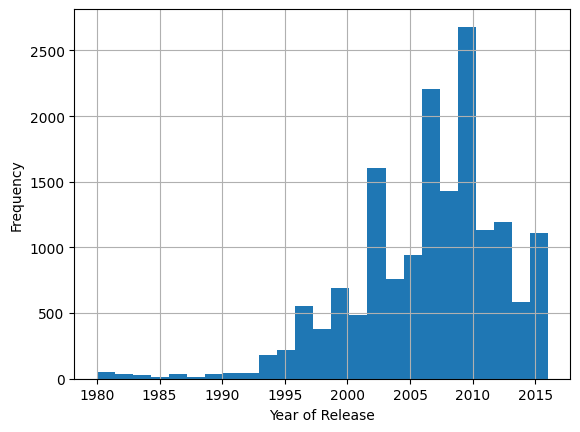

In [16]:
games['year_of_release'].hist(bins = 25)
plt.xlabel('Year of Release')
plt.ylabel('Frequency')
plt.show()

It looks like our data will be most significant after the year 2000 as we have a greater amount of games to work with.

<div class="alert alert-block alert-success">
<b>Reviewer's comment v1:</b>
    
Yes, looks like there were almost no games before 1995.

</div>

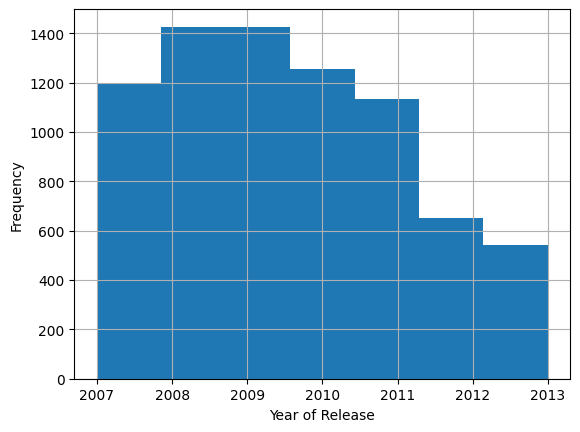

In [17]:
#we will use data from 2007 - 2013 which appears to be the "golden age" from this data #v2
filtered_games = games[(games['year_of_release'] >2006)&(games['year_of_release']<2014)]
filtered_games['year_of_release'].hist(bins = 7)
plt.xlabel('Year of Release')
plt.ylabel('Frequency')
plt.show()

<div class="alert alert-block alert-danger">
<b>Reviewer's comment v1:</b>
    
It is uncommon to use data for more than 2-3 years when forecasting next year's sales, even in case of traditional businesses. And in the dynamic computer games industry, taking longer time intervals should be avoided as it will definitely lead to tracking some obsolete trends. But you shouldn't take too short a period either.
    
Here I can advice first checking the platform lifecycle and visualize it to see what platforms still have sales.
    
Could you please share your thoughts or update that? 
   
    
Also you need to used filtered dataframe in the rest of the project.

<div class="alert alert-warning">
<b>Reviewer's comment v2:</b>
    
Great that you've filtered data. However here, I can actually advise focusing on the latest platform cycle: 2014-2016.


In [18]:
platform_sales = filtered_games.groupby(['platform'])[['total_sales']].sum().sort_values(['total_sales'],ascending=False) #v2
platform_sales #this is the total sales for each platform in the entire data

,total_sales
platform,
X360,853.15
PS3,842.20
Wii,748.96
DS,535.54
PSP,182.95
3DS,171.13
PS2,162.38
PC,133.52
WiiU,39.21


Let's take a look at the lifecycle of the highest selling consoles in our filtered dataset (v2)

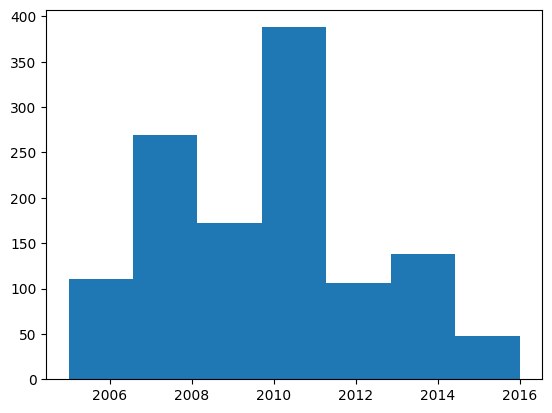

In [19]:
xbox_360_games = games[games['platform'] == 'X360'] #we need the entire dataset to look at the Xbox 360 lifespan #v2
plt.hist(xbox_360_games['year_of_release'], bins = 7)
plt.show()

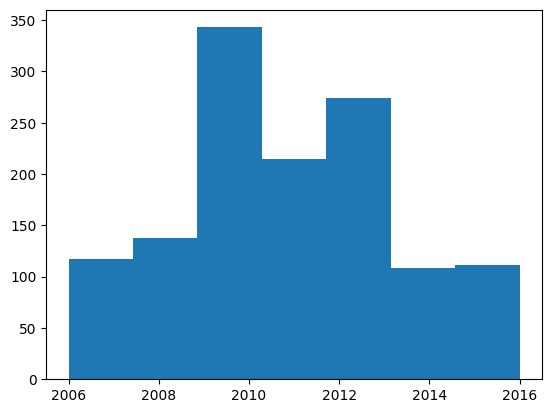

In [20]:
ps3_games = games[games['platform'] == 'PS3'] #we need the entire dataset to look at the PS3 lifespan #v2
plt.hist(ps3_games['year_of_release'], bins = 7)
plt.show()

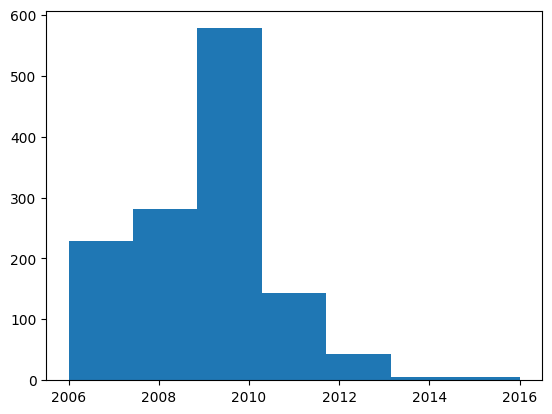

In [21]:
wii_games = games[games['platform'] == 'Wii'] #we need the entire dataset to look at the Wii lifespan #v2
plt.hist(wii_games['year_of_release'], bins = 7)
plt.show()

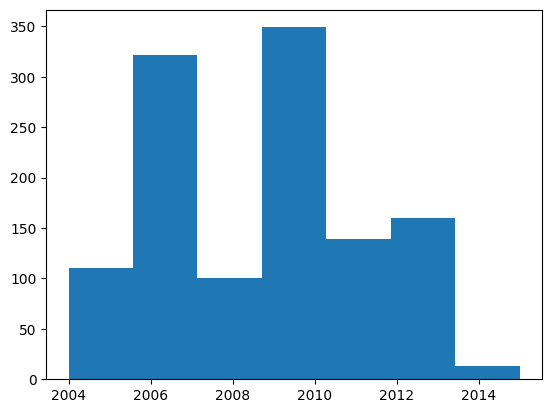

In [22]:
psp_games = games[games['platform'] == 'PSP'] #we need the entire dataset to look at the PSP lifespan #v2
plt.hist(psp_games['year_of_release'], bins = 7)
plt.show()

We have visualized the life spans of some of the most popular consoles in our filtered dataset. It does seem that they all peaked during this "golden age" we have selected, but we can still make a few more observations. PS3 and Xbox 360 still made significant sales throughout the life of the entire original dataset, which talks to the loyalty of players from previous consoles, or just a general boom of gaming. This is also impressive as well since a console that was also popular, the Wii, seemed to fade much faster and with much less mercy, perhaps speaking to the prevalence of outliers in its sales. It does seem popular consoles tend to have about a 3-5 year boom and then return to a more steady level. If the console relied heavily on just a few titles, more than likely their market share will fade much faster and have a shorter life. One last note, it also seems gaming consoles feed off of each other's popularity, seeing that 2009-2010 marked huge years for all the consoles observed. (v2)

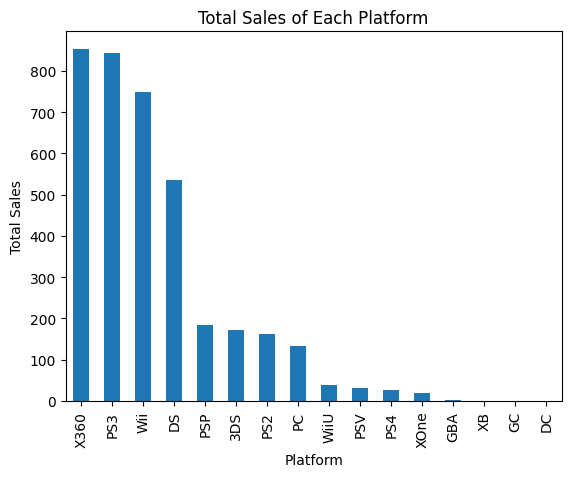

In [23]:
platform_sales.plot(kind = 'bar',y='total_sales', legend = False)
plt.title("Total Sales of Each Platform")
plt.ylabel("Total Sales")
plt.xlabel("Platform")
plt.show()

Here we can see the total all time sales for each platform, with the PS3 and Xbox 360 leading the way. Consoles like the XB, GC, and DC were nearing the end at this point in time. Let's select the Xbox One and everything to the left of that to use for our analysis. (v2)

In [24]:
delete = 'GBA', 'XB', 'GC', 'DC'
filtered_games = filtered_games[~filtered_games['platform'].isin(delete)]
print(filtered_games['platform'].value_counts())

DS      1778
Wii     1231
PS3     1060
X360    1010
PSP      881
PC       573
PS2      546
3DS      300
PSV      134
WiiU      74
XOne      19
PS4       16
Name: platform, dtype: int64


We have now filtered the data to only the most relevant consoles.

In [25]:
filtered_games.sample(10)

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
2312,LEGO Pirates of the Caribbean: The Video Game,DS,2011,Action,0.34,0.46,0.00,0.10,69.0,NaN,E10+,0.90
7495,Tenchu: Shadow Assassins,Wii,2008,Action,0.15,0.01,0.03,0.01,70.0,7.8,M,0.20
7862,Tomb Raider: Underworld,DS,2008,Action,0.15,0.02,0.00,0.01,70.0,8.4,T,0.18
5085,Just Dance 4,WiiU,2012,Misc,0.21,0.13,0.00,0.03,66.0,7.8,E10+,0.37
14149,Onechanbara Z Kagura,PS3,2013,Action,0.00,0.00,0.03,0.00,NaN,NaN,Undefined,0.03
11274,Winter Sports 2: The Next Challenge,PS2,2008,Sports,0.04,0.03,0.00,0.01,NaN,NaN,E,0.08
9415,I Spy: Universe,DS,2010,Puzzle,0.12,0.00,0.00,0.01,NaN,NaN,E,0.13
4185,Cars: Race-O-Rama,PS2,2009,Racing,0.27,0.03,0.00,0.17,NaN,NaN,E,0.47
11495,Sniper: Ghost Warrior 2,PC,2013,Shooter,0.02,0.05,0.00,0.01,52.0,5.8,M,0.08
14284,7 Wonders: Treasures of Seven,DS,2011,Puzzle,0.01,0.02,0.00,0.00,NaN,NaN,Undefined,0.03


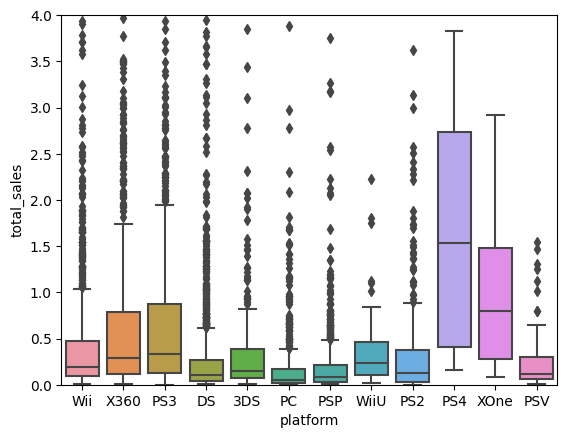

In [26]:
sns.boxplot(x='platform', y='total_sales', data=filtered_games)
plt.ylim(0,4)
plt.show()

Due to a large amount of outliers, we have limited the data here to view the interquartile range of each relevant console. The highest medians belong to the Xbox 360, PS3, Xbox One and PS4. The highest upper quartiles belong to these consoles as well. We can see the poorest median sales belong to the PC, PSP, and DS. (v2)

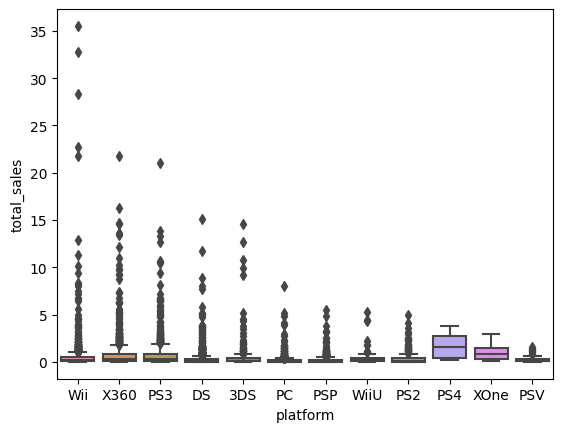

In [27]:
sns.boxplot(x='platform', y='total_sales', data=filtered_games)
plt.show()

<div class="alert alert-block alert-warning">
<b>Reviewer's comment v1:</b>

Everything is correct here. 
Additionally you could also hide outliers by adding parameter: `showfliers = False`. 

Despite the DS having poor median sales and a pretty low interquartile range, we can see it is still a top 5 performer in total sales in our data, meaning it has definitely been carried off the performance of its best games. The Wii is a relatively middle-of-the-pack performer in this data, but it has one of the highest selling games of all time, Wii Sports, which nearly everybody has some memory of playing. The PS3 and Xbox 360 appear to be the highest performing with regards to sales AND also consistency, without relying on single high performing games (Wii Sports sold more alone than SIX CONSOLES). The strong performance of the PS4 and Xbox One should not be highly regarded since the sample is still very small at this point. (v2)

In [28]:
ps2_games = filtered_games[filtered_games['platform'] == 'PS2'] #v2
ps2_games #taking only ps2 games from the dataframe

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
208,Guitar Hero III: Legends of Rock,PS2,2007,Misc,3.49,0.01,0.01,1.48,82.0,8.2,T,4.99
290,God of War II,PS2,2007,Action,2.32,0.04,0.04,1.67,93.0,8.9,M,4.07
349,Pro Evolution Soccer 2008,PS2,2007,Sports,0.05,0.00,0.64,2.93,82.0,7.9,E,3.62
436,FIFA Soccer 08,PS2,2007,Sports,0.68,0.00,0.00,2.46,83.0,6.5,E,3.14
474,Dragon Ball Z: Budokai Tenkaichi 3,PS2,2007,Fighting,1.15,0.00,0.76,1.09,73.0,9.2,T,3.00
...,...,...,...,...,...,...,...,...,...,...,...,...
16670,Sugar + Spice! Anoko no Suteki na Nanimokamo,PS2,2008,Adventure,0.00,0.00,0.01,0.00,NaN,NaN,Undefined,0.01
16671,Kanokon: Esuii,PS2,2008,Adventure,0.00,0.00,0.01,0.00,NaN,NaN,Undefined,0.01
16683,Scarlett: Nichijou no Kyoukaisen,PS2,2008,Adventure,0.00,0.00,0.01,0.00,NaN,NaN,Undefined,0.01
16689,Real Rode,PS2,2008,Adventure,0.00,0.00,0.01,0.00,NaN,NaN,Undefined,0.01


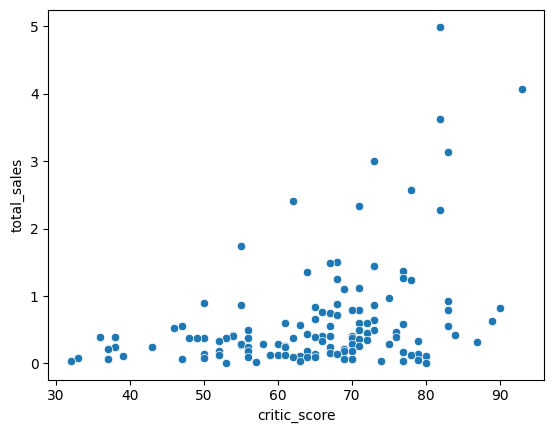

In [29]:
from matplotlib import rcParams
sns.scatterplot(data = ps2_games, x='critic_score', y='total_sales')
plt.rcParams['figure.figsize'] = (6, 5)
plt.show()

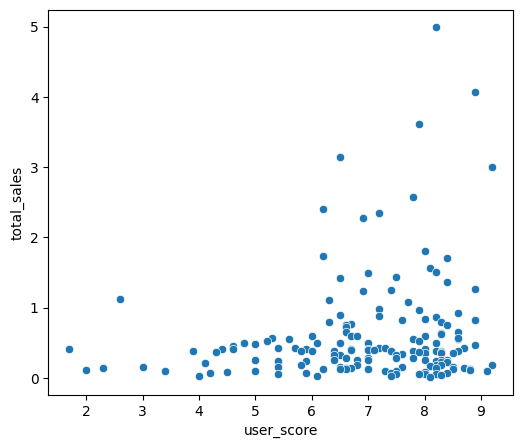

In [30]:
sns.scatterplot(data = ps2_games, x='user_score', y='total_sales')
plt.show()

Unfortunately, the scatter plots between critic/user scores and sales for PS2 games does not tell us much. The best of the best games have the highest sales and the highest ratings, however there are still plenty of games that recevied good reviews (at least 80 critic or 8 user score) and still did not sell much. It does seem that there is more to look at besides how well a game is received. At best, we can say there's a small positive correlation since games that scores under 60 critic score or 6 user score were a shoo-in to not sell many copies. Logically, a game like Wii Sports that can appeal to EVERYBODY seems more likely to sell than a more niche game like Pokemon, even if Pokemon was much better made. 

<div class="alert alert-block alert-success">
<b>Reviewer's comment v1:</b>

Well done! Very nice scatter plots.


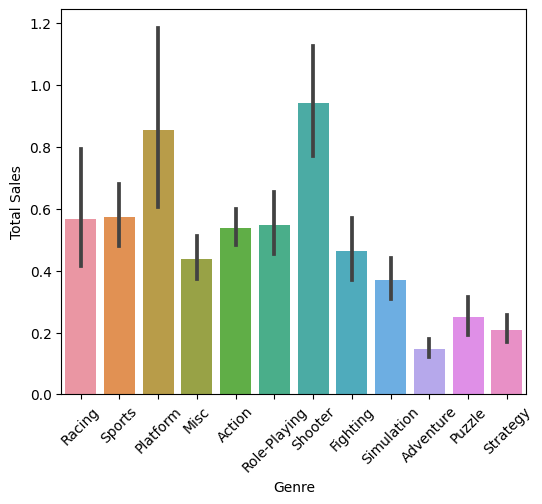

In [31]:
sns.barplot(data=filtered_games, x='genre',y='total_sales')
from matplotlib import rcParams
plt.rcParams['figure.figsize'] = (6, 5)
plt.xlabel('Genre')
plt.ylabel('Total Sales')
plt.xticks(rotation=45)
plt.show()

<div class="alert alert-success">
<b>Reviewer's comment v1:</b>

Well done! 

<div class="alert alert-warning">
<b>Reviewer's comment v1:</b>

Additionally you could rotate x labels (genres) by adding `plt.xticks(rotation=45)`

Puzzle, adventure, and strategy games have the least total sales by genre. Sports, racing, role-playing, platform, and shooter games have the highest total sales by genre. It's hard to draw general conclusions for certain, but shooter and sports games tend to be faster paced and more competitive. Adventure games tend to be very "grindy" where players spend a lot of time looking for things and leveling up, making it appeal more to a dedicated niche base of players. Puzzle games are also repetitive and have much less exciting aspects compared to the top genres. (v2)

In [32]:
regions = ['NA', 'EU', 'JP']

# Calculate sales per platform per region
top_platforms_by_region = {}
for region in regions:
    region_column = f'{region.lower()}_sales'
    top_platforms_by_region[region] = filtered_games.groupby('platform')[region_column].sum().sort_values(ascending=False).head(5)

# Print top platforms for each region
for region, platforms in top_platforms_by_region.items():
    print(f"Top platforms in {region}:")
    print(platforms)
    print()

Top platforms in NA:
platform
X360    525.38
Wii     413.93
PS3     359.24
DS      273.98
PS2      64.96
Name: na_sales, dtype: float64

Top platforms in EU:
platform
PS3     294.29
X360    241.56
Wii     212.11
DS      119.92
PC       80.41
Name: eu_sales, dtype: float64

Top platforms in JP:
platform
DS     102.93
PS3     67.11
PSP     65.88
Wii     59.13
3DS     56.38
Name: jp_sales, dtype: float64



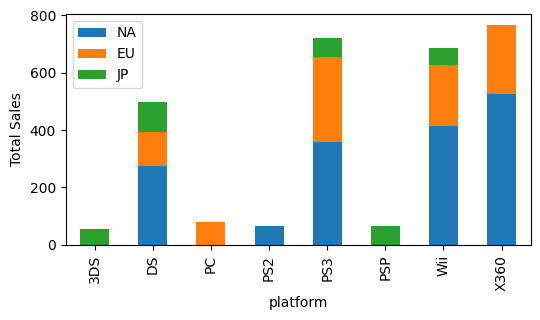

In [33]:
top_platforms_by_region #v2
df_platforms = pd.DataFrame(top_platforms_by_region)
df_platforms.plot(kind='bar', stacked=True, figsize=(6, 3))
plt.ylabel('Total Sales')
plt.show()

NA and EU regions are very similar as they have the same top 5 platforms, although the Xbox 360 had a much larger market share in NA compared to EU. A noticeable difference is the relevance of handhelds in the JP region, where the DS reigns supreme and the 3DS & PSP have a top 5 share in the region. We do see as well that the JP region just has a much smaller market share overall, perhaps due to less of a cultural significance of console video games which reign supreme in the NA and EU regions. (v2)

In [34]:
top_genres_by_region = {}
for region in regions:
    region_column = f'{region.lower()}_sales'
    top_genres_by_region[region] = filtered_games.groupby('genre')[region_column].sum().sort_values(ascending=False).head(5)

# Print top genres for each region
for region, genres in top_genres_by_region.items():
    print(f"Top genres in {region}:")
    print(genres)
    print()

Top genres in NA:
genre
Action          417.97
Sports          277.25
Shooter         271.09
Misc            243.22
Role-Playing    141.94
Name: na_sales, dtype: float64

Top genres in EU:
genre
Action     260.39
Sports     165.62
Shooter    164.64
Misc       114.44
Racing      90.50
Name: eu_sales, dtype: float64

Top genres in JP:
genre
Role-Playing    119.39
Action           66.71
Misc             43.18
Sports           37.02
Platform         23.30
Name: jp_sales, dtype: float64



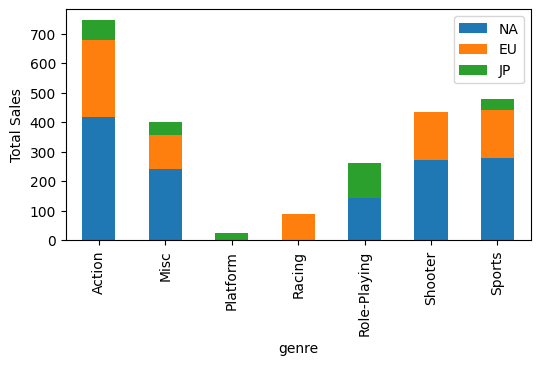

In [35]:
top_genres_by_region #v2
df_genres = pd.DataFrame(top_genres_by_region)
df_genres.plot(kind='bar', stacked=True, figsize=(6, 3))
plt.ylabel('Total Sales')
plt.show()

Once again, NA and EU exhibit similar market behaviors, sharing 4 of the 5 top genres. The only difference is NA leans more towards role-playing and EU leans more towards racing. The JP region is different in that they prefer role-playing over any other genre; notably Pokemon, a high seller,falls into this category. The platform category also makes an appearance for the top 5 in JP. Shooter games do not play as large a role in this region, likely because consoles have such a smaller market share over there.

In [36]:
sales_by_esrb_rating = {}

for region in regions:
    region_column = f'{region.lower()}_sales'
    sales_by_esrb_rating[region] = filtered_games.groupby('rating')[region_column].sum().sort_values(ascending=False)

# Print sales by ESRB rating for each region
for region, esrb_ratings in sales_by_esrb_rating.items():
    print(f"Sales by ESRB rating in {region}:")
    print(esrb_ratings)
    print()

Sales by ESRB rating in NA:
rating
E            612.53
M            450.13
T            332.24
E10+         254.34
Undefined    186.72
EC             1.32
RP             0.00
Name: na_sales, dtype: float64

Sales by ESRB rating in EU:
rating
E            334.80
M            292.42
T            183.78
Undefined    148.70
E10+         136.58
RP             0.03
EC             0.00
Name: eu_sales, dtype: float64

Sales by ESRB rating in JP:
rating
Undefined    187.81
E             86.12
T             59.96
M             33.08
E10+          27.45
EC             0.00
RP             0.00
Name: jp_sales, dtype: float64



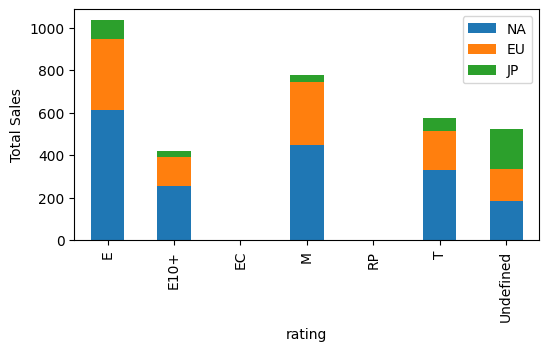

In [37]:
sales_by_esrb_rating #v2
df_esrb = pd.DataFrame(sales_by_esrb_rating)
df_esrb.plot(kind='bar', stacked=True, figsize=(6, 3))
plt.ylabel('Total Sales')
plt.show()

<div class="alert alert-danger">
<b>Reviewer's comment v1:</b>

Could you please visualize the data above? You can use either bar plots or pie charts, and arrange multiple graphs per dimension in one row.

https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.subplot.html
 

<div class="alert alert-block alert-success">
<b>Reviewer's comment v2:</b>

Thank you for the additional updates you've made. Looks great!

We can see now that the undefined ratings are most likely Japanese games that are rated by their own rating organization. Since we cannot know how to categorize these games from this data, we can only use the data from games that do have an ESRB rating. The E,M, and T ratings have the most sales in the NA and EU regions. E10+ is also a big seller in all 3 regions. From a marketing perspective, it seems NA and EU can be treated fairly similarly. Excluding the undefined games, JP games with a rating of E,M, and T are the highest sellers as well. 

# We are going to conduct a test between Xbox One user ratings and PC user ratings

Null Hypotheses (H₀):
The average user ratings for Xbox One and PC platforms are the same.

Alternative Hypotheses (H₁):
The average user ratings for Xbox One and PC platforms are different.

In [38]:
alpha = 0.05
# Filter user scores for Xbox One and PC platforms
xbox_one_ratings = games[games['platform'] == 'XOne']['user_score'].dropna()
pc_ratings = games[games['platform'] == 'PC']['user_score'].dropna()

# Perform t-test
t_stat, p_value = stats.ttest_ind(xbox_one_ratings, pc_ratings, equal_var=False)

print(f"P-value: {p_value}")

# Conclusion
if p_value < alpha:
    print("Reject the null hypothesis. There is a significant difference in average user ratings between Xbox One and PC.")
else:
    print("Fail to reject the null hypothesis. There is no significant difference in average user ratings between Xbox One and PC.")

P-value: 4.5385802963771835e-06
Reject the null hypothesis. There is a significant difference in average user ratings between Xbox One and PC.


Based on the sample of user ratings for the Xbox One and PC, it is nearly impossible for our test to achieve this result if the average ratings for both platforms is the same. It is more likely that they are different.

# We will conduct another test between the action and sports genres

Null Hypotheses (H₀):
The average user ratings for Action and Sports genres are the same.

Alternative Hypotheses (H₁):
The average user ratings for Action and Sports genres are different.

In [39]:
alpha = 0.05

#Filter data for action and sports genres
action_ratings = games[games['genre'] == "Action"]['user_score'].dropna()
sports_ratings = games[games['genre']== 'Sports']['user_score'].dropna()

#Conduct test
t_stat, p_value = stats.ttest_ind(action_ratings, sports_ratings, equal_var = False)
print(f"P-value: {p_value}")
if p_value < alpha:
    print("Reject the null hypothesis. There is a significant difference in average user ratings between Action and Sports genres.")
else:
    print("Fail to reject null hypothesis. There is no significant difference in average user ratings between Action and Sports genres.")
    

P-value: 0.07370217419278526
Fail to reject null hypothesis. There is no significant difference in average user ratings between Action and Sports genres.


Based on the sample of user ratings for the action and sports genres, it is likely for our test to achieve this result if the average ratings for both genres is the same. Therefore, we can accept that the average user ratings between the two genres is the same. 

<div class="alert alert-success">
<b>Reviewer's comment v1:</b>
    
- Everything is correct here. Hypotheses have been formulated correctly. 
- Your conclusions based on the results are also correct.
- You can also additionally compare the variances of the samples before testing hypotheses in order to understand with which equal_var parameter to use the ttest_ind test method (by default, True). Here you can manually calculate variances, or use Levene's statistic test (https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.levene.html) or Barlett's test (https: //docs.scipy .org / doc / scipy / reference / generated / scipy.stats.bartlett.html # scipy.stats.bartlett)
    

# Conclusion

Our original intent here was to identify patterns and increase our chances of finding the next big winner. Based on our analysis, we have found patterns and regional behavior that could help us find the next gem. NA and EU regions exhibit similar behavior regarding platforms and genre, but the NA region has the highest market share overall. Most efforts should go to these two regions regarding marketing. Consoles play a much bigger role in the Western regions, whereas handhelds play a large role in the JP region; handheld games are more likely to be a gem in the JP region. Shooters reign amongst the top genres in the Western world, but focusing on shooters in the JP region would most likely be a lost cause. User ratings don't tell us much immediately about whether a game is going to be a gem, but we do know it is very rare for a BAD game to become immensely popular. Games rated E and M tend to be the highest sellers, so while games that appeal to just adults can go far, it is also important that they can appeal to everybody. We also need to look for consistency, as the DS and Wii consoles had huge outliers that helped propel them to the top. 

<div class="alert alert-block alert-success">
<b>Reviewer's comment v1:</b>

Thank you for submitting your project! I really enjoyed reviewing it and I impressed by the results that you have accomplished. 
    
    
It is great that you added both overall and interim  conclusions after each section in your project. 
    
Overall, you provided correct and very detailed conclusions and insights based on your analysis.
    

